<h1> Evaluation <h/>

In [1]:
import pandas as pd
import numpy as np
import math
import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from IPython.display import clear_output, HTML

In [2]:
model = load_model("../best_model/B6_89classes-54-1.20.h5")

In [3]:
test_set = pd.read_csv('test_photo_eid_89classes.csv')

In [4]:
test_set

,photo_eid,pic_url,product_name
0,d7ec4683341240aca7a4ec4d923d2f22.jpg,https://img.wongnai.com/p/1920x0/2016/02/08/d7...,หอยแครงลวก
1,2fba791fbf3644c6b719af8d60313dfa.jpg,https://img.wongnai.com/p/1920x0/2017/03/08/2f...,ยำหมูยอ
2,14fab6312813410ea45d6be513ab155d.jpg,https://img.wongnai.com/p/1920x0/2016/01/30/14...,เย็นตาโฟ
3,4688bb5df7ca469b963c7790de4138f1.jpg,https://img.wongnai.com/p/1920x0/2016/05/25/46...,ยำปลาดุกฟู
4,582d9d1ba0264b4c83020fe79b24f5f6.jpg,https://img.wongnai.com/p/1920x0/2016/10/31/58...,ทาโกะยากิ
...,...,...,...
1327,d66b323abfa54d0e9b3dce0dda2d8e6d.jpg,https://img.wongnai.com/p/1920x0/2018/02/20/d6...,น้ำตกหมู
1328,b44dceae8936425193b420c96762a8a8.jpg,https://img.wongnai.com/p/1920x0/2018/01/11/b4...,ทอดมันปลากราย
1329,50713eca338e43aea789dc11c0a3c403.jpg,https://img.wongnai.com/p/1920x0/2016/02/23/50...,ข้าวผัดกระเทียม
1330,f15006539f1747de90f271e95928abf7.jpg,https://img.wongnai.com/p/1920x0/2017/04/15/f1...,หมูสะเต๊ะ


In [5]:
def extract_labels(df):
    product_names = df["product_name"].values.tolist()
    return product_names

In [6]:
test_labels = extract_labels(test_set)

In [7]:
encoder = LabelEncoder()
encoder.fit(test_labels)
print(encoder.classes_)
print(len(encoder.classes_))

['Pizza' 'Salmon Sashimi' 'honey toast' 'กระเพาะปลา' 'กุ้งอบวุ้นเส้น'
 'กุ้งเผา' 'กุ้งแช่น้ำปลา' 'ก๋วยจั๊บ' 'ก๋วยจั๊บญวน' 'ก๋วยเตี๋ยวคั่วไก่'
 'ก๋วยเตี๋ยวต้มยำ' 'ก๋วยเตี๋ยวเรือ' 'ขนมจีน' 'ขนมจีบ' 'ขนมปัง'
 'ขนมปังปิ้ง' 'ขาหมูเยอรมัน' 'ข้าวขาหมู' 'ข้าวคลุกกะปิ' 'ข้าวซอยไก่'
 'ข้าวผัด' 'ข้าวผัดกระเทียม' 'ข้าวมันไก่' 'ข้าวหน้าเนื้อ' 'ข้าวหน้าเป็ด'
 'ข้าวหมกไก่' 'ข้าวหมูกรอบ' 'ข้าวหมูแดง' 'ข้าวเหนียวมะม่วง' 'คอหมูย่าง'
 'ชาบู' 'ตับหวาน' 'ติ่มซำ' 'ต้มยำ' 'ต้มเลือดหมู' 'ต้มแซ่บกระดูกอ่อน'
 'ทอดมันกุ้ง' 'ทอดมันปลากราย' 'ทาโกะยากิ' 'น้ำตกหมู' 'น้ำพริกไข่ปู'
 'บะหมี่แห้ง' 'ปลากระพงทอดน้ำปลา' 'ปลากระพงนึ่งมะนาว' 'ปลาหมึกผัดไข่เค็ม'
 'ปอเปี๊ยะทอด' 'ปูนิ่มทอดกระเทียม' 'ปูผัดผงกะหรี่' 'ปูม้านึ่ง'
 'ผักโขมอบชีส' 'ผัดไทกุ้งสด' 'ยำถั่วพลู' 'ยำปลาดุกฟู' 'ยำวุ้นเส้น'
 'ยำสาหร่าย' 'ยำหมูยอ' 'ยำแซลมอน' 'ลาบ' 'สปาเก็ตตี้ขี้เมาทะเล'
 'สปาเก็ตตี้คาโบนาร่า' 'สลัด' 'สเต็กหมู' 'ส้มตำ' 'หมูกรอบ' 'หมูมะนาว'
 'หมูสะเต๊ะ' 'หมูแดดเดียว' 'หอยนางรม' 'หอยแครงลวก' 'ออส่วน' 'ฮะเก๋า'
 'เกี๊ยวซ่า' 'เกี๊ยวทอด' 'เนื้อย่าง' '

In [8]:
#Load and preprocess test_set
def load_test_data(test_set):
    data = []
    for i in range(len(test_set)):
        img_path =  "dev_data/test_" + str(len(encoder.classes_)) + "classes/" + str(test_set['product_name'][i]) + "/" + str(test_set['photo_eid'][i])
        img = image.load_img(img_path, target_size=(224, 224))
        array_img = image.img_to_array(img)/255
        data.append(array_img)
    data = np.array(data)
    return data

In [9]:
test_images = load_test_data(test_set)

In [10]:
test_images.shape

(1332, 224, 224, 3)

In [11]:
def evaluate_on_threshold(predictions, y_true, threshold):
    pred_count = 0
    tp_count = 0
    for idx, pred in enumerate(predictions):
        max_prob = np.max(pred)
        if max_prob > threshold:
            pred_count +=1
            y_pred = encoder.inverse_transform([np.argmax(pred)])[0]
            if y_pred == y_true[idx]:
                tp_count +=1
        else:
            if y_true[idx] == 'อื่นๆ':
                pred_count +=1
                tp_count +=1
                
    precision = round(tp_count*100/pred_count, 2)
    recall = round(tp_count*100/predictions.shape[0], 2)
    possible_collected = round(pred_count*100/predictions.shape[0], 2)
    f1 = 2 * (precision * recall) / (precision + recall)

    return pd.DataFrame(data=[[threshold, pred_count, tp_count, precision, recall, possible_collected, f1]], columns=['threshold', 'all_predictions', 'correct_predictions', 'precision(%)', 'recall(%)', 'possible_collected(%)', 'f1'])
    return pd.DataFrame(data=[[threshold, pred_count, tp_count, precision, recall, possible_collected, f1]], columns=['threshold', 'all_predictions', 'correct_predictions', 'precision(%)', 'recall(%)', 'possible_collected(%)', 'f1'])

In [12]:
#Make prediction
predictions = model.predict(test_images, steps=math.ceil(len(test_images)/32))

In [13]:
all_eval = pd.DataFrame({})
thresholds = np.arange(0.1, 0.95, 0.01)
for threshold in thresholds:
    all_eval = all_eval.append(evaluate_on_threshold(predictions, test_labels, threshold)).reset_index(drop=True)

In [14]:
all_eval.head(50)

,threshold,all_predictions,correct_predictions,precision(%),recall(%),possible_collected(%),f1
0,0.10,1310,1207,92.14,90.62,98.35,91.373679
1,0.11,1301,1203,92.47,90.32,97.67,91.382356
2,0.12,1286,1195,92.92,89.71,96.55,91.286790
3,0.13,1279,1193,93.28,89.56,96.02,91.382157
4,0.14,1270,1187,93.46,89.11,95.35,91.233177
5,0.15,1265,1186,93.75,89.04,94.97,91.334318
6,0.16,1260,1183,93.89,88.81,94.59,91.279375
7,0.17,1248,1177,94.31,88.36,93.69,91.238097
8,0.18,1236,1168,94.50,87.69,92.79,90.967726
9,0.19,1223,1160,94.85,87.09,91.82,90.804512


,threshold,all_predictions,correct_predictions,precision(%),recall(%),possible_collected(%),f1
1,0.11,1301,1203,92.47,90.32,97.67,91.382356


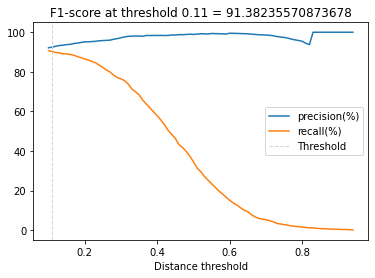

In [15]:
opt_f1 = np.max(all_eval['f1'])
opt_idx = np.argmax(all_eval['f1'])
opt_tau = thresholds[opt_idx]

# Plot F1 score and accuracy as function of distance threshold
plt.plot(thresholds, all_eval['precision(%)'], label='precision(%)');
plt.plot(thresholds, all_eval['recall(%)'], label='recall(%)');
plt.axvline(x=opt_tau, linestyle='--', lw=1, c='lightgrey', label='Threshold')
plt.title('F1-score at threshold {} = {}'.format(opt_tau, opt_f1));
plt.xlabel('Distance threshold')
plt.legend();
plt.savefig('dev_model/B6_eval.png')
all_eval[all_eval['threshold']==opt_tau]

In [16]:
#Select threshold 
threshold = 0.3
max_prob = [round(p, 3) for p in np.max(predictions, axis=1)*100] 
pred_name = [name if max_prob[i] > threshold*100 else "อื่นๆ" for i, name in enumerate(encoder.inverse_transform(np.argmax(predictions, axis=1)))]

In [17]:
test_set["max_prob"] = max_prob
test_set["pred_name"] = pred_name

In [18]:
#Table contains all the correct predictions
correct_predictions = test_set[(test_set['product_name'] == test_set['pred_name']) & (test_set['pred_name'] != 'อื่นๆ')]

In [19]:
#Table contains all the incorrect predictions
wrong_predictions = test_set[(test_set['product_name'] != test_set['pred_name']) & (test_set['pred_name'] != 'อื่นๆ')]

In [20]:
#Table contains all the images neglected by the threshold
not_predicted = test_set[(test_set['product_name'] != test_set['pred_name']) & (test_set['pred_name'] == 'อื่นๆ')]

In [21]:
### NOTE: Some of the wrong predictions were actually correct; however, there are errors in the true_label. Hence, we may see better result if we further clean the test_set ###

In [22]:
#See numbers of wrong predictions in each class
wrong_predictions.product_name.value_counts()

ต้มยำ                  2
ก๋วยเตี๋ยวต้มยำ        2
ทอดมันกุ้ง             2
ข้าวหน้าเป็ด           2
ต้มเลือดหมู            2
เนื้อย่าง              1
หมูแดดเดียว            1
ปูผัดผงกะหรี่          1
ยำวุ้นเส้น             1
ไก่ย่าง                1
ยำแซลมอน               1
ก๋วยเตี๋ยวเรือ         1
หมูกรอบ                1
ตับหวาน                1
บะหมี่แห้ง             1
ขนมปังปิ้ง             1
ไข่กระทะ               1
หมูมะนาว               1
ข้าวมันไก่             1
ข้าวหมูแดง             1
ข้าวขาหมู              1
ติ่มซำ                 1
สปาเก็ตตี้คาโบนาร่า    1
ไก่ทอด                 1
Name: product_name, dtype: int64

In [23]:
#See numbers of images in each class we did not predict
not_predicted.product_name.value_counts()

ไก่ทอด                 10
ลาบ                    10
สลัด                   10
ข้าวหน้าเป็ด            8
ขนมจีน                  8
                       ..
ปูม้านึ่ง               1
ต้มแซ่บกระดูกอ่อน       1
สปาเก็ตตี้คาโบนาร่า     1
ปลากระพงนึ่งมะนาว       1
ยำหมูยอ                 1
Name: product_name, Length: 79, dtype: int64

In [24]:
pd.set_option('display.max_colwidth', -1)

# create img tag
def image_formatter(path):
    return '<img src="'+ path + '" style=max-height:124px;"/>'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [25]:
# Show all test images table
show_img = test_set[['pic_url', 'product_name', 'pred_name', 'max_prob']]
HTML(show_img.to_html(formatters={'pic_url': image_formatter}, escape=False))

,pic_url,product_name,pred_name,max_prob
0,,หอยแครงลวก,หอยแครงลวก,65.023003
1,,ยำหมูยอ,ยำหมูยอ,57.748001
2,,เย็นตาโฟ,เย็นตาโฟ,33.653999
3,,ยำปลาดุกฟู,ยำปลาดุกฟู,56.058998
4,,ทาโกะยากิ,ทาโกะยากิ,35.623001
5,,เป็ดปักกิ่ง,เป็ดปักกิ่ง,50.213001
6,,ส้มตำ,ส้มตำ,46.006001
7,,ข้าวหมูกรอบ,ข้าวหมูกรอบ,58.819000
8,,ต้มยำ,ต้มยำ,54.528999
9,,ออส่วน,ออส่วน,56.998001


In [26]:
# show correct predictions
show_img = correct_predictions[['pic_url', 'product_name', 'pred_name', 'max_prob']]
HTML(show_img.to_html(formatters={'pic_url': image_formatter}, escape=False))

,pic_url,product_name,pred_name,max_prob
0,,หอยแครงลวก,หอยแครงลวก,65.023003
1,,ยำหมูยอ,ยำหมูยอ,57.748001
2,,เย็นตาโฟ,เย็นตาโฟ,33.653999
3,,ยำปลาดุกฟู,ยำปลาดุกฟู,56.058998
4,,ทาโกะยากิ,ทาโกะยากิ,35.623001
5,,เป็ดปักกิ่ง,เป็ดปักกิ่ง,50.213001
6,,ส้มตำ,ส้มตำ,46.006001
7,,ข้าวหมูกรอบ,ข้าวหมูกรอบ,58.819000
8,,ต้มยำ,ต้มยำ,54.528999
9,,ออส่วน,ออส่วน,56.998001


In [27]:
# show incorrect predictions
show_img = wrong_predictions[['pic_url', 'product_name', 'pred_name', 'max_prob']]
HTML(show_img.to_html(formatters={'pic_url': image_formatter}, escape=False))

,pic_url,product_name,pred_name,max_prob
24,,ข้าวหน้าเป็ด,ข้าวหมูแดง,31.112000
66,,ทอดมันกุ้ง,ทอดมันปลากราย,30.733999
75,,ปูผัดผงกะหรี่,ปูม้านึ่ง,40.501999
92,,ยำวุ้นเส้น,สปาเก็ตตี้ขี้เมาทะเล,50.716000
93,,ต้มเลือดหมู,ก๋วยจั๊บ,45.666000
160,,ติ่มซำ,ขนมจีบ,82.911003
168,,เนื้อย่าง,คอหมูย่าง,38.659000
213,,ข้าวมันไก่,ปูม้านึ่ง,32.917000
225,,ตับหวาน,น้ำตกหมู,36.641998
268,,สปาเก็ตตี้คาโบนาร่า,คอหมูย่าง,31.141001
